In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from dsp_preprocess import label_process
from keras.optimizers import Adam
from keras.models import load_model
'''
import argparse


ap = argparse.ArgumentParser()
ap.add_argument("-d", "--dataset", required=True,
	help="path to input dataset (i.e., directory of images)")
ap.add_argument("-m", "--model", required=True,
	help="path to output model")

args = vars(ap.parse_args())
'''


'\nimport argparse\n\n\nap = argparse.ArgumentParser()\nap.add_argument("-d", "--dataset", required=True,\n\thelp="path to input dataset (i.e., directory of images)")\nap.add_argument("-m", "--model", required=True,\n\thelp="path to output model")\n\nargs = vars(ap.parse_args())\n'

In [3]:
EPOCHS = 30
INIT_LR = 1e-3
BS = 20
print('Build model...')
model = Sequential()
model.add(Dense(units=12, activation='sigmoid', input_shape=(12,)))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(15, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# xt, yt = label_process("data/chordtest0.csv", "data/chordtest0.wav")

Build model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
# train the network
print("[INFO] training network...")
H = model.fit(
    xt, yt, validation_split=0.2,
	epochs=EPOCHS, verbose=1)

# save the model to disk
print("[INFO] serializing network...")
model.save("model_test.h5")


[INFO] training network...
Train on 400 samples, validate on 100 samples
Epoch 1/30
400/400 [==============================] - 1s 2ms/step - loss: 0.6953 - acc: 0.4695 - val_loss: 0.6619 - val_acc: 0.5553
Epoch 2/30
400/400 [==============================] - 0s 309us/step - loss: 0.6359 - acc: 0.6633 - val_loss: 0.5988 - val_acc: 0.8093
Epoch 3/30
400/400 [==============================] - 0s 277us/step - loss: 0.5703 - acc: 0.7913 - val_loss: 0.5305 - val_acc: 0.8120
Epoch 4/30
400/400 [==============================] - 0s 332us/step - loss: 0.5022 - acc: 0.8295 - val_loss: 0.4623 - val_acc: 0.8693
Epoch 5/30
400/400 [==============================] - 0s 234us/step - loss: 0.4368 - acc: 0.8660 - val_loss: 0.4048 - val_acc: 0.8693
Epoch 6/30
400/400 [==============================] - 0s 284us/step - loss: 0.3886 - acc: 0.8700 - val_loss: 0.3659 - val_acc: 0.8693
Epoch 7/30
400/400 [==============================] - 0s 416us/step - loss: 0.3586 - acc: 0.8678 - val_loss: 0.3447 - val_acc

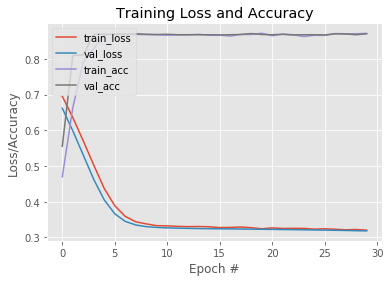

In [8]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.show()

In [4]:
model = load_model('model_test.h5')


Instructions for updating:
Use tf.cast instead.


In [5]:
model = Sequential()
model.add(Dense(units=12, activation='sigmoid', input_shape=(12,)))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(15, activation='sigmoid'))
model.load_weights('model_test.h5')


In [6]:
import librosa
from dsp_preprocess import label_process
from dsp_preprocess import chroma_process
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
import scipy
import csv

np.set_printoptions(threshold=np.inf)

In [7]:
y0, sr0 = librosa.load("test/Soviet_Union_National_Anthem.wav")
x_train = chroma_process(y0, sr0)

print(x_train)

[36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 36, 37, 37, 37, 37, 37, 36, 37, 38, 36, 38, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 36, 37, 37, 37, 37, 37, 37, 36, 37, 37, 37, 38, 37, 37, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 36, 38, 36, 37, 37, 37, 37, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 36, 37, 37, 37, 37, 37, 36, 37, 38, 36, 38, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 36, 37, 37, 37, 37, 37, 37, 36, 37, 40, 40, 40, 40, 40, 40, 39, 40, 43, 43, 43, 43, 43, 43, 43, 43, 37, 37, 37, 37, 37, 37, 37]
[  5.2013   6.0372   6.8963   7.7555   8.6146   9.4737  10.3329  11.192
  12.0512  12.9103  13.7694  14.6054  15.4645  16.3236  17.1828  18.0419
  18.901   19.7602  20.6193  21.4785  22.3376  23.1967  24.0559  24.915
  25.7741  26.6101  27.4692  28.3283  29.1875  30.0466  30.9058  31.7417
  32.6008  33.4832  34.3191  35.2015  36.0374  36.8965  37.7556  38.6148
  39.473

In [71]:
a = model.predict(x_train)
print(a)

[[0.061773   0.06372395 0.08525535 0.0811184  0.06088161 0.0754067
  0.09492511 0.07483172 0.06748953 0.07249832 0.0810596  0.0881674
  0.46168658 0.04469621 0.45745775]
 [0.05731824 0.05696911 0.08641744 0.08033514 0.06001619 0.07921836
  0.07965711 0.07918701 0.06748304 0.06815639 0.08082384 0.07651579
  0.4649164  0.03939882 0.45885938]
 [0.05573782 0.05543545 0.08522955 0.07881331 0.05824649 0.07743245
  0.07911596 0.07769394 0.06585395 0.06675649 0.0793606  0.07568091
  0.46451586 0.03861943 0.45744187]
 [0.07768652 0.07728407 0.08683026 0.08811808 0.07969943 0.08443558
  0.09213841 0.08522436 0.08085153 0.0829446  0.08993018 0.09209463
  0.47080487 0.05048993 0.46962297]
 [0.08012784 0.08108896 0.08468279 0.0846954  0.08172783 0.08335546
  0.09104645 0.08314782 0.0825215  0.08397713 0.08945069 0.08935943
  0.47116688 0.0510512  0.47124717]
 [0.05897132 0.05964282 0.08553305 0.08185884 0.05858305 0.07528442
  0.09280023 0.07550865 0.06548381 0.07021329 0.08015344 0.08745047
  0.46

In [78]:
labels = [["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "NC", "M", "m"]]
ans = []

#accounting for the missing beat
#np.append(beats, [10000000])
#print(len(beats))

j=-1
beat = 0
for i in a:
    key = [labels[0][i[:12].argmax()], labels[0][13+i[13:].argmax()], beat]
    ans.append(key)
    j+=1
    print(j)
    if (j==151):
        j=150
    if (j!=0):
        beat = beats[j]-beats[j-1]
    else:
        beat = beats[j]
    
print(ans)
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
151
[['D#', 'm', 0], ['B', 'm', 224], ['B', 'm', 36], ['D#', 'm', 37], ['D#', 'm', 37], ['D#', 'm', 37], ['D#', 'm', 37], ['A', 'm', 37], ['A', 'm', 37], ['D#', 'm', 37], ['C', 'm', 37], ['D#', 'm', 37], ['A', 'm', 36], ['A', 'm', 37], ['A#', 'm', 37], ['D#', 'm', 37], ['D#', 'm', 37], ['A#', 'm', 37], ['D', 'm', 37], ['D#', 'm', 37], ['D', 'm', 37], ['D#', 'm', 37], ['G', 'm', 37], ['D#', 'm', 37], ['D#', 'm', 37], ['D#', 'm', 37], ['D#', 'm', 36], ['C', 'm', 37], ['D', 'm', 37], ['A#', 'm', 37],

In [80]:
with open('preds.csv', 'w', newline='') as csvfile:
    fieldnames = ['key', 'tone', 'beat']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    #writer.writeheader()
    for i in ans:
        writer.writerow({'key': i[0], 'tone':i[1], 'beat':i[2]})


FileNotFoundError: [Errno 2] No such file or directory: 'test/predictions/preds.csv'

In [73]:
print((beats))
print(len(x_train))

[ 224  260  297  334  371  408  445  482  519  556  593  629  666  703
  740  777  814  851  888  925  962  999 1036 1073 1110 1146 1183 1220
 1257 1294 1331 1367 1404 1442 1478 1516 1552 1589 1626 1663 1700 1737
 1774 1811 1848 1885 1921 1958 1995 2032 2069 2106 2143 2179 2216 2253
 2290 2328 2365 2402 2438 2475 2512 2549 2586 2623 2660 2697 2734 2771
 2807 2844 2881 2918 2955 2992 3029 3066 3103 3140 3177 3214 3251 3287
 3325 3361 3398 3435 3472 3509 3545 3582 3619 3656 3693 3730 3767 3804
 3841 3878 3915 3952 3989 4026 4063 4099 4136 4173 4210 4247 4284 4320
 4357 4395 4431 4469 4505 4542 4579 4616 4653 4690 4727 4764 4801 4838
 4874 4911 4948 4985 5022 5059 5096 5132 5169 5209 5249 5289 5329 5369
 5409 5448 5488 5531 5574 5617 5660 5703 5746 5789 5832]
153


In [ ]:
labels = [["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "NC", "M", "m"]]
    # y_train_key = np.zeros((len(x_train), 13))
    # y_train_min_maj = np.zeros((len(x_train), 3))
y_train = np.zeros((len(x_train), len(labels[0])))
mlb = MultiLabelBinarizer()

chdict = {"A": 0, "A#": 1, "Bb": 1, "B": 2, "C": 3, "C#": 4, "Db": 4, "D": 5, "D#": 6,
              "Eb": 6, "E": 7, "F": 8, "F#": 9, "Gb": 9, "G": 10, "G#": 11, "Ab": 11, "NC":12}
    # mmdict = {"M": 0, "m": 1, "NC": 2}
mlb.fit(labels)
    # print(mlb.classes_)
with open(label_csv, newline='') as csvfile:
    r = csv.reader(csvfile)

    ri = 0
    for row in r:
        for i in range(int(row[2])):
            print(row[0])
            row[0] = labels[0][chdict.get(row[0])]
            y_train[ri] = mlb.transform([tuple(row[:2])])
            ri += 1



In [17]:
print(x)
print("aaaaa")
print(y)

[[5.43486512e-01 5.31445991e-02 3.12991389e-01 5.46475047e-02
  7.10064843e-01 4.49323965e-02 8.19157559e-02 1.00000000e+00
  1.80757364e-01 4.53113697e-02 3.85205358e-02 2.97934100e-01]
 [3.43683600e-01 3.24557974e-02 2.62337891e-01 3.94855411e-02
  7.71915597e-01 2.84116929e-02 7.07081763e-02 1.00000000e+00
  1.52070507e-01 3.19814731e-02 2.95610453e-02 2.61017265e-01]
 [4.29661661e-01 2.67439656e-02 2.79681533e-01 2.35000914e-02
  4.14263356e-01 2.01152054e-02 6.86530462e-02 1.00000000e+00
  7.60307247e-02 3.97301742e-02 3.13935925e-02 1.80247510e-01]
 [6.07060671e-01 3.24615507e-02 1.11114411e-01 3.09503267e-02
  6.41611187e-01 3.08100822e-02 5.10320774e-02 1.00000000e+00
  7.38560512e-02 3.26586174e-02 3.51134843e-02 2.15113979e-01]
 [3.87457111e-01 4.64497242e-02 2.76987831e-01 5.99875340e-01
  5.10712234e-02 2.19976497e-02 6.24145515e-02 1.00000000e+00
  5.23311212e-02 3.70027174e-02 1.41054419e-01 1.04767618e-01]
 [2.66743797e-01 2.66325323e-02 2.51926176e-01 7.48965442e-01
  8